Import libraries


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_seq_items", None)
pd.set_option("display.width", 0)
pd.set_option("display.max_colwidth", None)

Data

In [124]:
data_raw = pd.read_csv("/home/jakub/Pulpit/Credit original/data/raw/train.csv")
df = data_raw


/tmp/ipykernel_77903/2348835374.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv("/home/jakub/Pulpit/Credit original/data/raw/train.csv")


Function

In [125]:
def cols_to_drop(df):
    cols_to_drop = ["SSN","Customer_ID","Name","ID"]
    df = df.drop(columns=cols_to_drop)
    return df

In [126]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [127]:
df['Age'].describe()

count    95061.000000
mean       110.934505
std        689.407864
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

In [128]:
def clean_age(df):
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df.loc[(df['Age'] < 18) | (df['Age'] > 100), 'Age'] = np.nan
    return df

In [129]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [130]:
def clean_occupation(df):
    df['Occupation'] = df['Occupation'].mask(df['Occupation'] == '_______', np.nan)
    return df

In [131]:
def clean_annual_income(df):
    df['Annual_Income'] = (
    pd.to_numeric(
        df['Annual_Income']
        .replace('[^0-9.,-]', '', regex=True)
        .str.replace(',', '.', regex=False),
        errors='coerce'  
    )
    )
    upper = df['Annual_Income'].quantile(0.99)
    df.loc[(df['Annual_Income'] < 0) | (df['Annual_Income'] > upper), 'Annual_Income'] = np.nan
    return df

In [132]:
def clean_monthly_inhand_salary(df):
    df["Monthly_Inhand_Salary"] = pd.to_numeric(df["Monthly_Inhand_Salary"], errors='coerce')
    upper = df["Monthly_Inhand_Salary"].quantile(0.99)
    df.loc[((df["Monthly_Inhand_Salary"] <= 0) | df["Monthly_Inhand_Salary"] > upper), "Monthly_Inhand_Salary"] = np.nan
    return df

In [133]:
def num_bank_accounts(df):
    df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce')
    upper = df['Num_Bank_Accounts'].quantile(0.90)
    df.loc[(df['Num_Bank_Accounts'] < 0) | (df['Num_Bank_Accounts'] > upper), 'Num_Bank_Accounts'] = np.nan
    return df

In [134]:
def clean_num_credit_card(df):
    df["Num_Credit_Card"] = pd.to_numeric(df["Num_Credit_Card"], errors='coerce')
    upper = df["Num_Credit_Card"].quantile(0.90)
    df.loc[(df["Num_Credit_Card"] <= 0) | (df["Num_Credit_Card"] > upper), "Num_Credit_Card"] = np.nan
    return df

In [135]:
def clean_intrest_rate(df):
    df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'], errors='coerce')
    upper = df['Interest_Rate'].quantile(0.90)
    df.loc[(df['Interest_Rate'] < 0) | (df['Interest_Rate'] > upper), 'Interest_Rate'] = np.nan
    return df

In [136]:
def clean_num_of_loan(df):
    df['Num_of_Loan'] = df['Num_of_Loan'].astype(str)
    df['Num_of_Loan'] = df['Num_of_Loan'].replace('[^0-9.,-]', '', regex=True)
    df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(',', '.', regex=False)
    df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
    upper = df['Num_of_Loan'].quantile(0.99)
    df.loc[(df['Num_of_Loan'] < 0 ) | (df['Num_of_Loan'] > upper), 'Num_of_Loan'] = np.nan
    return df

In [137]:
def clean_type_of_loan(df):
    
    df['Type_of_Loan'] = df['Type_of_Loan'].fillna("")
    
    df['Type_of_Loan'] = (
        df['Type_of_Loan']
        .str.replace(' and ', ', ', regex=False)
        .str.replace(' ,', ',', regex=False)
        .str.replace(',,', ',', regex=False)
        .str.strip()
    )
    df['Type_of_Loan'] = df['Type_of_Loan'].apply(
        lambda x: [] if x == "" else [t.strip() for t in x.split(',')]
    )
    
    return df

In [138]:
def clean_delay_from_due_date(df):
    df['Delay_from_due_date'] = pd.to_numeric(df['Delay_from_due_date'], errors='coerce')
    upper = df['Delay_from_due_date'].quantile(0.99)
    df.loc[(df['Delay_from_due_date'] < 0) | (df['Delay_from_due_date'] > upper), 'Delay_from_due_date'] = np.nan
    return df

In [139]:
df['Type_of_Loan'].head(2)

0    Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
1    Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Name: Type_of_Loan, dtype: object

In [140]:
def clean_num_of_delayed_payment(df):
    df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str)
    df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
    upper = df['Num_of_Delayed_Payment'].quantile(0.99)
    df.loc[(df['Num_of_Delayed_Payment'] < 0) | (df['Num_of_Delayed_Payment'] > upper), 'Num_of_Delayed_Payment'] = np.nan
    return df 

In [141]:
def clean_changed_credit_limit(df):
    df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(str)
    df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].mask(df['Changed_Credit_Limit'] == '_' , np.nan)
    df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
    return df

In [142]:
def clean_num_credit_inquiries(df):
    df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')
    upper = df['Num_Credit_Inquiries'].quantile(0.98)
    df.loc[(df['Num_Credit_Inquiries'] < 0) | (df['Num_Credit_Inquiries'] > upper), 'Num_Credit_Inquiries'] = np.nan
    return df

In [143]:
def clean_credit_mix(df):
    df['Credit_Mix'] = df['Credit_Mix'].astype(str)
    df['Credit_Mix'] = df['Credit_Mix'].mask(df['Credit_Mix'] == '_' , np.nan)
    return df

In [144]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [145]:
def clean_outstanding_debt(df):
    df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str)
    df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
    return df
df = clean_outstanding_debt(df)

In [146]:
def clean_credit_utilization_ratio(df):
    upper = df['Credit_Utilization_Ratio'].quantile(0.99)
    df.loc[(df['Credit_Utilization_Ratio'] < 0) | (df['Credit_Utilization_Ratio'] > upper), 'Credit_Utilization_Ratio'] = np.nan
    return df 

In [147]:
df['Credit_History_Age'].head(20)

0      22 Years and 1 Months
1                        NaN
2      22 Years and 3 Months
3      22 Years and 4 Months
4      22 Years and 5 Months
5      22 Years and 6 Months
6      22 Years and 7 Months
7                        NaN
8      26 Years and 7 Months
9      26 Years and 8 Months
10     26 Years and 9 Months
11    26 Years and 10 Months
12    26 Years and 11 Months
13     27 Years and 0 Months
14     27 Years and 1 Months
15     27 Years and 2 Months
16     17 Years and 9 Months
17    17 Years and 10 Months
18    17 Years and 11 Months
19                       NaN
Name: Credit_History_Age, dtype: object

In [148]:
def clean_credit_history_age(df):
    df['Credit_History_Age'] = (
        df['Credit_History_Age']
        .str.extract(r'(\d+)\s+Years.*?(\d+)\s+Months')
        .astype(float)
        .apply(lambda x: x[0]*12 +x[1], axis=1)
    )
    return df

In [149]:
df['Payment_of_Min_Amount'].unique()


array(['No', 'NM', 'Yes'], dtype=object)

In [150]:
def clean_payment_of_min_amount(df):
    df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', np.nan)
    return df

In [151]:
def clean_total_emi_per_month(df):
    limit = df['Total_EMI_per_month'].quantile(0.94)
    df.loc[df['Total_EMI_per_month'] > limit, 'Total_EMI_per_month'] = np.nan
    return df

In [152]:
def clean_amount_invested_monthly(df):
    df['Amount_invested_monthly'] = (
    df['Amount_invested_monthly']
    .astype(str)
    .str.replace('__', '', regex=True)
    .replace('nan', np.nan)
    .astype(float)
)
    limit = df['Amount_invested_monthly'].quantile(0.90)
    df.loc[df['Amount_invested_monthly'] > limit, 'Amount_invested_monthly'] = np.nan
    return df

In [153]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [154]:
def clean_payment_behaviour(df):
    df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str)
    df['Payment_Behaviour'] = df['Payment_Behaviour'].mask(df['Payment_Behaviour'] == '!@9#%8', np.nan)
    return df

In [155]:
def clean_monthly_balance(df):   
    df['Monthly_Balance'] = (
        df['Monthly_Balance']
        .astype(str)
        .str.replace('__', '', regex=False)
        .replace('nan', np.nan)
    )
    df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
    df.loc[df['Monthly_Balance'] < 0, 'Monthly_Balance'] = np.nan
    return df

In [156]:
def clean_all(df):
    df = cols_to_drop(df) 
    df = clean_age(df) 
    df = clean_occupation(df) 
    df = clean_annual_income(df) 
    df = clean_monthly_inhand_salary(df) 
    df = num_bank_accounts(df) 
    df = clean_num_credit_card(df) 
    df = clean_intrest_rate(df) 
    df = clean_num_of_loan(df) 
    df = clean_type_of_loan(df) 
    df = clean_delay_from_due_date(df) 
    df = clean_num_of_delayed_payment(df) 
    df = clean_changed_credit_limit(df) 
    df = clean_num_credit_inquiries(df) 
    df = clean_credit_mix(df)
    df = clean_outstanding_debt(df) 
    df = clean_credit_utilization_ratio(df) 
    df = clean_credit_history_age(df) 
    df = clean_payment_of_min_amount(df) 
    df = clean_total_emi_per_month(df)
    df = clean_amount_invested_monthly(df) 
    df = clean_payment_behaviour(df) 
    df = clean_monthly_balance(df)
    return df

In [157]:
df = clean_all(df)

In [158]:
df.to_csv('/home/jakub/Pulpit/Credit original/data/clean/clean_data.csv', index=False)

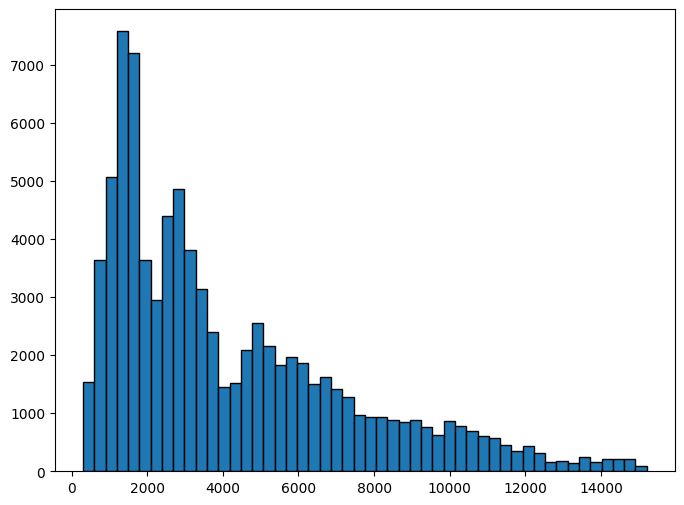

In [159]:
plt.figure(figsize=(8,6))
plt.hist(df['Monthly_Inhand_Salary'], bins=50, edgecolor='black')
plt.show()

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       86937 non-null   float64
 2   Occupation                92938 non-null   object 
 3   Annual_Income             99001 non-null   float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         93408 non-null   float64
 6   Num_Credit_Card           92820 non-null   float64
 7   Interest_Rate             90108 non-null   float64
 8   Num_of_Loan               95652 non-null   float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       98621 non-null   float64
 11  Num_of_Delayed_Payment    88785 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      96101 non-null   fl

(array([ 6712.,  2293., 10131.,  9940.,  3616.,  2196.,  5099.,  5846.,
         4787.,  3706.,  3494.,  1616.,  1593.,  1638.,  2623.,  3157.,
         2058.,  2078.,  2382.,  1895.,  1659.,  1877.,  1530.,  1560.,
          954.,   944.,  1130.,   992.,  1022.,  1061.,   642.,   776.,
          868.,   865.,   794.,   749.,   839.,   403.,   459.,   601.,
          393.,   215.,   120.,   199.,   253.,   198.,   246.,   285.,
          230.,   277.]),
 array([  7005.93 ,  10465.557,  13925.184,  17384.811,  20844.438,
         24304.065,  27763.692,  31223.319,  34682.946,  38142.573,
         41602.2  ,  45061.827,  48521.454,  51981.081,  55440.708,
         58900.335,  62359.962,  65819.589,  69279.216,  72738.843,
         76198.47 ,  79658.097,  83117.724,  86577.351,  90036.978,
         93496.605,  96956.232, 100415.859, 103875.486, 107335.113,
        110794.74 , 114254.367, 117713.994, 121173.621, 124633.248,
        128092.875, 131552.502, 135012.129, 138471.756, 141931.383

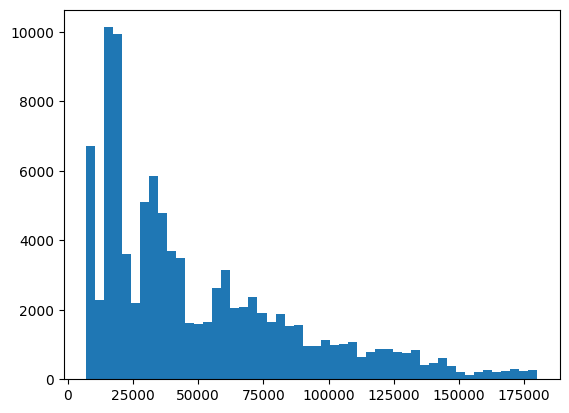

In [161]:
plt.hist(df['Annual_Income'], bins=50)

In [162]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,86937.000000,99001.000000,84998.000000,93408.000000,92820.000000,90108.000000,95652.000000,98621.000000,88785.000000,97909.000000,96101.000000,98991.000000,99000.000000,90970.000000,94001.000000,85969.000000,98791.000000
mean,34.426366,50497.576053,4194.170850,5.108299,5.298104,13.012307,3.533758,20.875189,13.403187,10.389025,5.747963,1426.503700,32.168325,221.195405,92.240745,157.849115,402.551258
std,10.123932,38296.622971,3183.686167,2.413141,1.840016,7.354791,2.447308,14.377322,6.186629,6.789496,3.817865,1155.045753,5.006525,99.741364,86.360117,120.717587,213.925499
min,18.000000,7005.930000,303.645417,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,26.000000,19344.270000,1625.568229,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.009595,144.000000,28.213058,69.484429,270.106630
50%,34.000000,36993.940000,3093.745000,5.000000,5.000000,12.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.370000,32.221527,219.000000,64.064671,121.428910,336.731225
75%,42.000000,71676.000000,5957.448333,7.000000,7.000000,18.000000,5.000000,28.000000,18.000000,14.870000,8.000000,1948.200000,36.377794,302.000000,135.763782,208.637552,470.262938
max,100.000000,179987.280000,15204.633333,9.000000,9.000000,29.000000,9.000000,61.000000,27.000000,36.970000,16.000000,4998.070000,42.450948,404.000000,385.255046,577.171032,1602.040519
